# Capstone 3: Unsupervised learning (revised)

## instructions
 
For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

How do you achieve the following using clustering techniques?

    1. Determine whether a subject is walking or running. 

Next steps:

    1. Find a dataset of interest. 

    2. Explore the data. You should understand how it was gathered, what's in it, and what the variables look like.

    3. Try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: 

    -how do clustering and modeling compare? 
    -What are the advantages of each? 
    -Why would you want to use one over the other?

This will ultimately include the following deliverables:

    A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
    A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.

Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

Rather than create a deck in a presentation tool like PowerPoint or Google Slides, we will use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.

On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

    Your end-user and the value your project provides to them.
    Quantifiable results based on the research you’ve conducted.
    The visuals you chose and what they represent for your research.
    Next steps you'd take to expand on your work.
    A specified research question your model addresses.
    How you chose your model specification and what alternatives you compared it to.
    The practical uses of your model for an audience of interest.
    Any weak points or shortcomings of your model.

## data source (revised)

https://www.kaggle.com/maamli/imu-data-on-walking-and-running-unlabeled

**Context**

A project where we classify human activity based on accelerometer, gyroscope and magnetometer data (device was attached to the feet)



**Content**

During the experimental data collection, we distinguished between the 2 activities (walking and running) based on 2 beats from the foot. That means, the user strikes twice on the ground, starts with walking, stops, strikes twice again, starts running, stops-two strikes-walks… and this continues. The data is unlabeled.

## import, clean, examine data

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\walk_run.csv')   

C:\Users\katec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df.head(15)

,------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz -----------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Serial Number: TAS1F06180329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start Time 11:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Start Date 10/24/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Epoch Period (hh:mm:ss) 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Download Time 11:41:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Download Date 10/24/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Current Memory Address: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Current Battery Voltage: 4.15 Mode = 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Timestamp,Accelerometer X,Accelerometer Y,Accelerometer Z,Temperature,Gyroscope X,Gyroscope Y,Gyroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119910 entries, 0 to 119909
Data columns (total 11 columns):
------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz  -----------    119910 non-null object
Unnamed: 1                                                                                                                                       119901 non-null object
Unnamed: 2                                                                                                                                       119901 non-null object
Unnamed: 3                                                                                                                                       119901 non-null object
Unnamed: 4                                                                                                                                       119901 non-null object
Unnamed: 5                                       

In [6]:
df.isnull().sum()

------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz  -----------    0
Unnamed: 1                                                                                                                                       9
Unnamed: 2                                                                                                                                       9
Unnamed: 3                                                                                                                                       9
Unnamed: 4                                                                                                                                       9
Unnamed: 5                                                                                                                                       9
Unnamed: 6                                                                                                            

In [7]:
#drop top columns
df = df.drop(df.index[0:10])

In [8]:
df.isnull().sum()

------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz  -----------    0
Unnamed: 1                                                                                                                                       0
Unnamed: 2                                                                                                                                       0
Unnamed: 3                                                                                                                                       0
Unnamed: 4                                                                                                                                       0
Unnamed: 5                                                                                                                                       0
Unnamed: 6                                                                                                            

In [9]:
#convert all columns to numeric
for col in  df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119900 entries, 10 to 119909
Data columns (total 11 columns):
------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz  -----------    119900 non-null object
Unnamed: 1                                                                                                                                       119900 non-null float64
Unnamed: 2                                                                                                                                       119900 non-null float64
Unnamed: 3                                                                                                                                       119900 non-null float64
Unnamed: 4                                                                                                                                       119900 non-null float64
Unnamed: 5                                  

In [11]:
#change column names to remove unwanted spaces
df.columns = df.columns.str.replace('Unnamed: ', 'feature_')

In [12]:
df.head()

,------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz -----------,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
10,2018-10-24T11:20:00.0000000,0.046875,-0.008301,1.015625,31.689790,-1.403809,1.403809,-0.549316,-11.132812,7.03125,24.316405
11,2018-10-24T11:20:00.0100000,0.049316,-0.003906,1.016602,31.698775,-1.647949,1.342774,-0.549316,-11.132812,7.03125,24.316405
12,2018-10-24T11:20:00.0200000,0.045898,-0.010742,1.010254,31.695780,-2.258301,1.159668,-0.549316,-11.132812,7.03125,24.316405
13,2018-10-24T11:20:00.0300000,0.044922,-0.010254,1.014160,31.698775,-2.258301,1.098633,-0.549316,-11.132812,7.03125,24.316405
14,2018-10-24T11:20:00.0400000,0.050781,-0.011719,1.008301,31.677809,-2.380371,1.037598,-0.549316,-11.132812,7.03125,24.316405


In [13]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000,119900.000000
mean,0.044691,-0.254725,1.102015,29.956131,-0.046242,5.134208,-2.052618,26.720086,15.417841,22.098464
std,0.593758,0.989269,1.262319,0.749879,202.262280,53.390381,48.887520,13.125187,8.974751,9.798000
min,-10.541504,-16.000000,-16.000000,28.931231,-1565.307713,-956.359922,-591.674841,-21.826171,-17.138671,-31.054686
25%,-0.048828,-0.128418,0.955078,29.521281,-12.573243,-0.061035,-3.540039,16.406249,10.693359,20.214843
50%,-0.030273,-0.076172,1.011230,29.635577,-1.159668,0.976563,-0.610352,30.029295,16.259765,25.195311
75%,0.049805,-0.040310,1.066895,30.258095,-0.323028,4.943848,-0.004425,33.984373,20.654296,28.564452
max,11.620605,13.056641,15.999512,31.863510,619.689979,663.024943,589.294470,57.714841,49.511716,54.931638


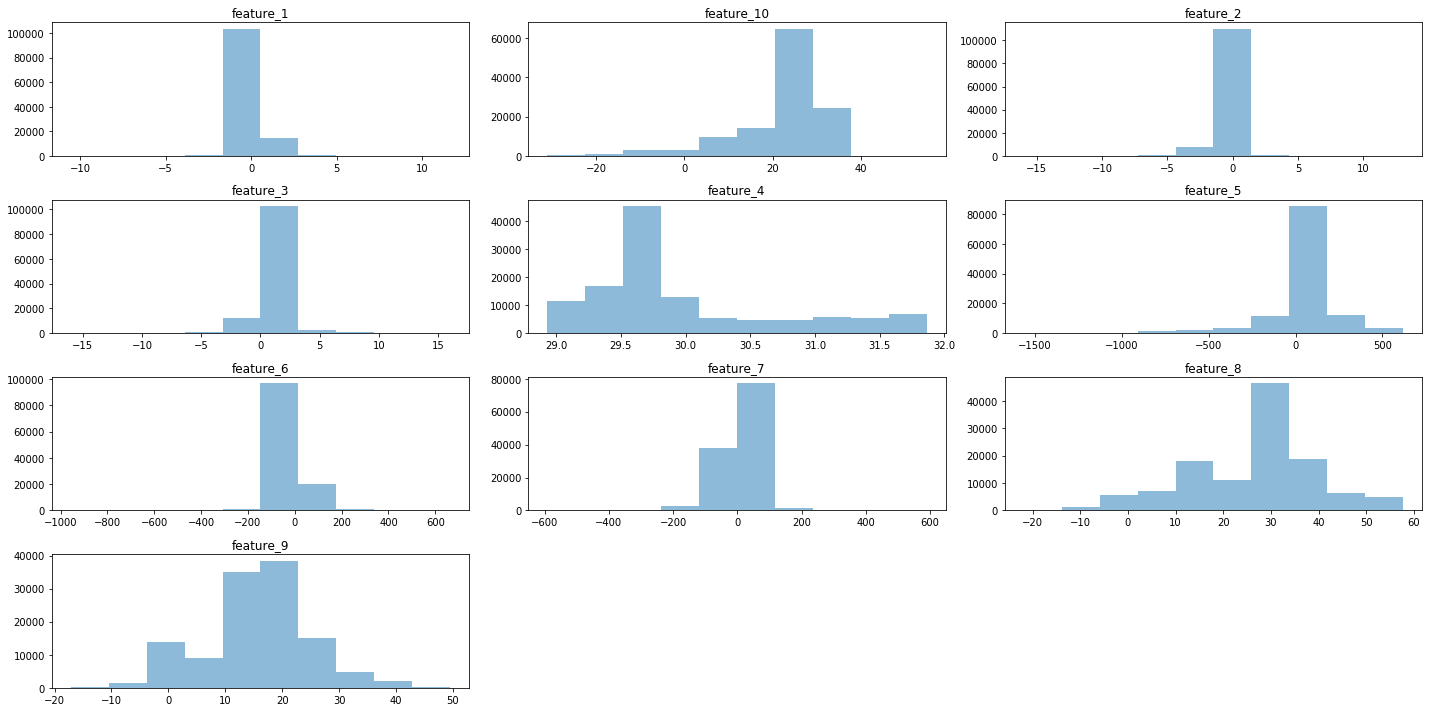

In [14]:
df.hist(grid=False, alpha=0.5, figsize=(20, 10))
plt.tight_layout()

## k-means cluster

### normalize data

In [15]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.iloc[:, 1:]
X_std = scaler.fit_transform(X)

### divide into training and test sets
Although there is no compelling reason to split data into train/test for unsupervised learning, I will set aside a very small portion of the data as a "test" portion should I need a subset of "untouched" data. 

In [16]:
X_train, X_test = train_test_split(
    X_std,
    test_size=0.9,
    random_state=42)

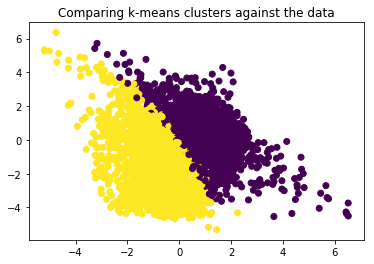

In [17]:
# Reduce data to two components for plotting
# run very general KMeans algorithm in order to have initial look at data
X_pca = PCA(2).fit_transform(X_train)

# Calculate predicted values.
y_train = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.title('Comparing k-means clusters against the data')
plt.show()

### fit kmeans

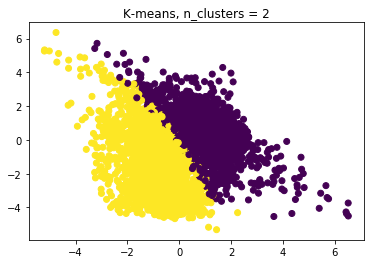

In [18]:
# using 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
pred_y = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y)
plt.title('K-means, n_clusters = 2')
plt.show()


In [19]:
kmeans.cluster_centers_

array([[-0.14153173,  0.12999003,  0.07984759,  0.48443656, -0.33448326,
         0.03870295, -0.10223279, -0.13450678,  0.58940934,  0.50407742],
       [ 0.17047611, -0.14138377, -0.11791934, -0.54125725,  0.39500994,
        -0.02407409,  0.1304092 ,  0.14918155, -0.69217416, -0.56014691]])

In [20]:
print(kmeans.labels_)

[1 0 1 ... 1 0 0]


In [21]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
silhoueette_2kmeans = silhouette_score(X_train, kmeans.labels_)

print(silhoueette_2kmeans)

0.17047106999950123


#### determine optimal k value

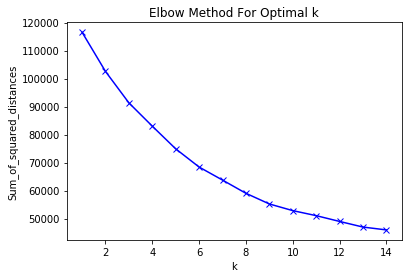

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

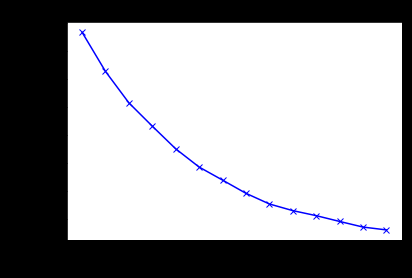

##### No clear "elbow" visible. Will run algorithm using k = 10 and k = 14 to determine best value. 

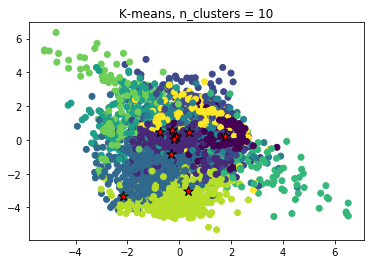

In [23]:
#using 10 clusters
kmeans10 = KMeans(n_clusters=10, init='k-means++', random_state=42)
pred_y = kmeans10.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y)
plt.scatter(kmeans10.cluster_centers_[:, 0], 
            kmeans10.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('K-means, n_clusters = 10')
plt.show()

In [24]:
# Calculate silhouette_score

silhouette_kmeans10 = silhouette_score(X_train, kmeans10.labels_)
print(silhouette_kmeans10)

0.3247081532332731


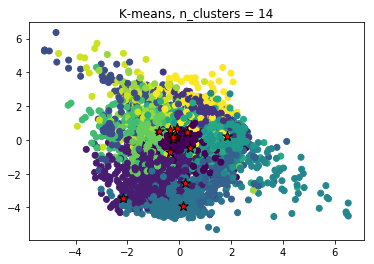

In [25]:
#using 14 clusters
kmeans14 = KMeans(n_clusters=14, init='k-means++', random_state=42)
pred_y14 = kmeans14.fit_predict(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y14)
plt.scatter(kmeans14.cluster_centers_[:, 0], 
            kmeans14.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('K-means, n_clusters = 14')
plt.show()

In [26]:
# Calculate silhouette_score

silhouette_kmeans14 = silhouette_score(X_train, kmeans14.labels_)
print(silhouette_kmeans14)

0.33211110662263094


#### evaluation
Based on the silhouette_score, the algorithm with n_clusters = 14  performs better than the n_clusters = 10 algorithm and the n_clusters = 2 algorithm. 

### mini batch kmeans

#### mini batch kmeans with 'random' centroids

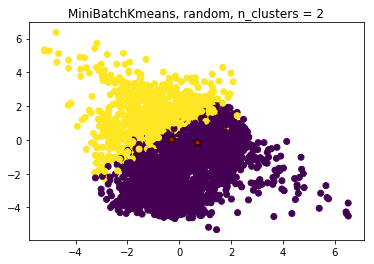

In [27]:
#initiate random centroids, 2 clusters
# Each batch will be made up of 200 data points.
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini_2random = minibatch_random.predict(X_train)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini_2random)
plt.scatter(minibatch_random.cluster_centers_[:, 0], 
            minibatch_random.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, random, n_clusters = 2')
plt.show()

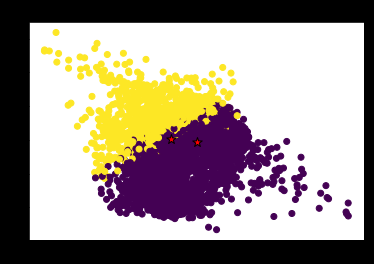

In [28]:
# Calculate silhouette_score
silhoueette_minibatch_2random = silhouette_score(X_train, minibatch_random.labels_)
print(silhoueette_minibatch_2random)

0.22989078864585283


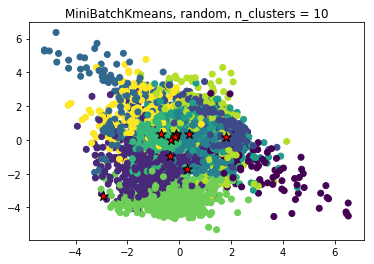

In [29]:
#initiate random centroids, clusters = 10
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini_10random = minibatch_random.predict(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini_10random)
plt.scatter(minibatch_random.cluster_centers_[:, 0], 
            minibatch_random.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, random, n_clusters = 10')
plt.show()

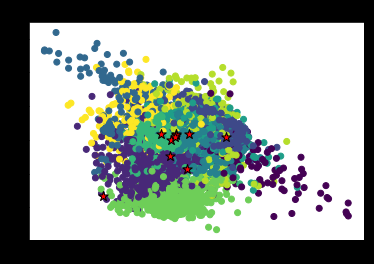

In [30]:
# Calculate silhouette_score
silhoueette_minibatch_10random = silhouette_score(X_train, minibatch_random.labels_)
print(silhoueette_minibatch_10random)

0.242357187058493


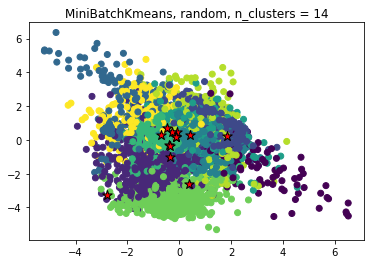

In [31]:
#initiate random centroids, clusters = 14
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=14,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini_14random = minibatch_random.predict(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini_10random)
plt.scatter(minibatch_random.cluster_centers_[:, 0], 
            minibatch_random.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, random, n_clusters = 14')
plt.show()

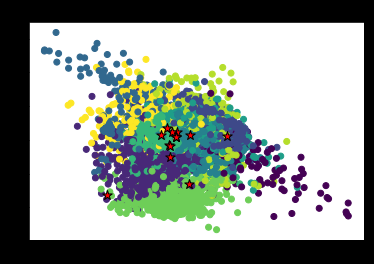

In [32]:
# Calculate silhouette_score
silhoueette_minibatch_14random = silhouette_score(X_train, minibatch_random.labels_)
print(silhoueette_minibatch_14random)

0.2869333503173517


#### mini batch kmeans with 'k-means++' centroids

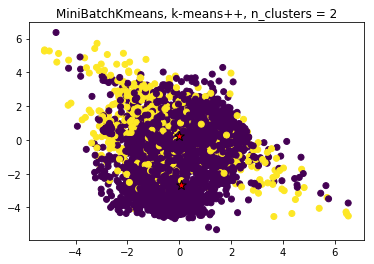

In [33]:
#choosing centroid mean
minibatch_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=2,
    batch_size=200,
    random_state=42)
X_train_mini = minibatch_kmeans.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatch_kmeans.predict(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], 
            minibatch_kmeans.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, k-means++, n_clusters = 2')
plt.show()

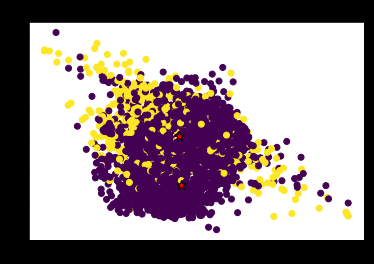

In [34]:
# Calculate silhouette_score
silhoueette_minibatch_2kmeans = silhouette_score(X_train, minibatch_kmeans.labels_)
print(silhoueette_minibatch_2kmeans)

0.41819947754929143


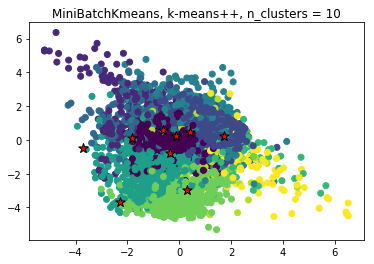

In [35]:
#choosing centroid mean
minibatch_10kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=10,
    batch_size=200,
    random_state=42)
X_train_10mini = minibatch_10kmeans.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_10mini = minibatch_10kmeans.predict(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_10mini)
plt.scatter(minibatch_10kmeans.cluster_centers_[:, 0], 
            minibatch_10kmeans.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, k-means++, n_clusters = 10')
plt.show()

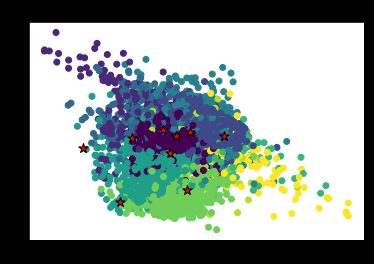

In [36]:
# Calculate silhouette_score
silhoueette_minibatch_10kmeans = silhouette_score(X_train, minibatch_10kmeans.labels_)
print(silhoueette_minibatch_10kmeans)

0.27018152901988807


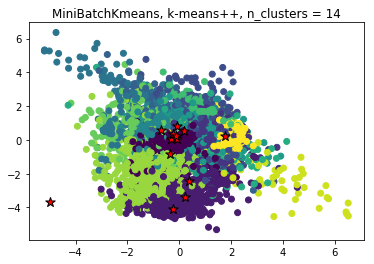

In [37]:
#choosing centroid mean
minibatch_14kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=14,
    batch_size=200,
    random_state=42)
X_train_mini = minibatch_14kmeans.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_14mini = minibatch_14kmeans.predict(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_14mini)
plt.scatter(minibatch_14kmeans.cluster_centers_[:, 0], 
            minibatch_14kmeans.cluster_centers_[:, 1], s=100, marker='*',
            c='red', edgecolor='black')
plt.title('MiniBatchKmeans, k-means++, n_clusters = 14')
plt.show()

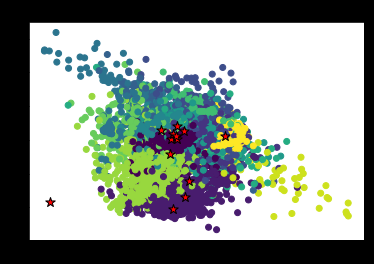

In [38]:
# Calculate silhouette_score
silhoueette_minibatch_14kmeans = silhouette_score(X_train, minibatch_14kmeans.labels_)
print(silhoueette_minibatch_14kmeans)

0.30691898387588223


#### evaluation
The MiniBatchKMeans initialized with 'k-means++' with n_cluster = 2  outperforms the other MiniBatch, 'k-means++' initialized, algorithms with 10 & 14 clusters as well as the 'random' initiation of algorithms with any number of clusters. The Silhouette_score for the MiniBatchKMeans ('k-means++') algorithm with 2 clusters is currently the best performing algorithm. 

### mean shift

In [39]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# set the bandwidth automatically; function derives a bandwidth
# number based on an inspection of the distances among points 
# in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 191


Number of estimated clusters: 191

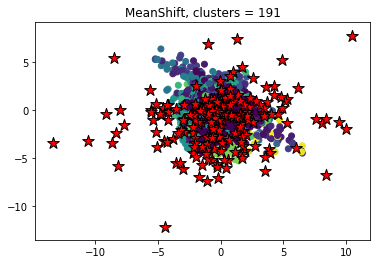

In [40]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=150, marker='*',
    c='red', edgecolor='black',
    label='centroids')

plt.title('MeanShift, clusters = {}'.format(n_clusters_))
plt.show()


In [41]:
# Calculate silhouette_score
silhoueette_mean_shift = silhouette_score(X_train, ms.labels_)
print(silhoueette_mean_shift)

0.1275659078343392


#### evaluation
The MeanShift algorithm is currently the worst performing algoritm. 

### affinity propagation

In [42]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# did not provide arguments to the model
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 901


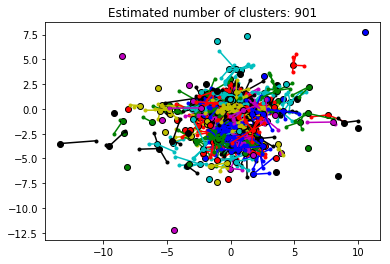

In [43]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = af_labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

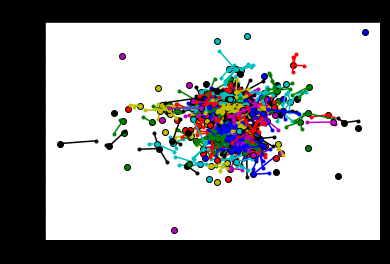

In [44]:
# Calculate silhouette_score
silhoueette_affinity_prop = silhouette_score(X_train, af.labels_)
print(silhouette_score(X_train, af.labels_))

0.3223031831842373


#### evaluation
The AffinityPropagation algorithm performs better than roughly half of the other algorithms. Although the silhouette score places this algorithm in the top half performers, practically speaking, the creation of 900+ cluters is difficult to work with. 

## evaluation of algorithms

In [45]:
#silhouette_score
print('Silhouette_scores as follows:')
print('KMeans, 2 clusters: ', silhoueette_2kmeans)
print('KMeans, 10 clusters: ', silhouette_kmeans10)
print('KMeans, 14 clusters: ', silhouette_kmeans14)
print('Minibatch, 2 clusters, random initiation: ', silhoueette_minibatch_2random)
print('Minibatch, 10 clusters, random initiation: ', silhoueette_minibatch_10random)
print('Minibatch, 14 clusters, random initiation: ', silhoueette_minibatch_14random)
print('Minibatch, 2 clusters, k-means++ initiation: ', silhoueette_minibatch_2kmeans)
print('Minibatch, 10 clusters, k-means++ initiation: ', silhoueette_minibatch_10kmeans)
print('Minibatch, 14 clusters, k-means++ initiation: ', silhoueette_minibatch_14kmeans)
print('MeanShift: ', silhoueette_mean_shift)
print('AffinityPropagation: ', silhoueette_affinity_prop)

Silhouette_scores as follows:
KMeans, 2 clusters:  0.17047106999950123
KMeans, 10 clusters:  0.3247081532332731
KMeans, 14 clusters:  0.33211110662263094
Minibatch, 2 clusters, random initiation:  0.22989078864585283
Minibatch, 10 clusters, random initiation:  0.242357187058493
Minibatch, 14 clusters, random initiation:  0.2869333503173517
Minibatch, 2 clusters, k-means++ initiation:  0.41819947754929143
Minibatch, 10 clusters, k-means++ initiation:  0.27018152901988807
Minibatch, 14 clusters, k-means++ initiation:  0.30691898387588223
MeanShift:  0.1275659078343392
AffinityPropagation:  0.3223031831842373


Silhouette_scores as follows:
KMeans, 2 clusters:  0.17047106999950123
KMeans, 10 clusters:  0.3247081532332731
KMeans, 14 clusters:  0.33211110662263094
Minibatch, 2 clusters, random initiation:  0.22989078864585283
Minibatch, 10 clusters, random initiation:  0.242357187058493
Minibatch, 14 clusters, random initiation:  0.2869333503173517
Minibatch, 2 clusters, k-means++ initiation:  0.41819947754929143
Minibatch, 10 clusters, k-means++ initiation:  0.27018152901988807
Minibatch, 14 clusters, k-means++ initiation:  0.30691898387588223
MeanShift:  0.1275659078343392
AffinityPropagation:  0.3223031831842373

In [46]:
# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

X = df.iloc[:, 1:]


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Data frame to store features and predicted cluster memberships.
predictions_df = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [47]:
# Split the data into four equally-sized samples. First break in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time 
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. Use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    predictions_df['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    predictions_df['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    nclust = 2
# Generate cluster predictions and store them for best algorithm 
    pred = MiniBatchKMeans(
    init='k-means++',
    n_clusters=2,
    batch_size=200,
    random_state=42).fit_predict(data[0])
    predictions_df['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [48]:
predictions_df.head()

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,pca_f1_sample2,pca_f2_sample2,clust2_sample2,pca_f1_sample3,pca_f2_sample3,clust2_sample3
0,-2.767683,-0.566999,0,0.408947,-0.323700,0,-1.175590,2.635686,1,2.199816,0.125437,0
1,-0.048798,0.081952,1,0.892412,0.163385,0,-0.732951,0.140169,0,2.049472,2.341885,0
2,-0.433359,0.344319,0,0.946642,-1.705074,1,-1.309720,-1.974566,0,1.145131,-0.425575,0
3,-2.812823,-0.563772,0,0.020937,0.622209,0,-2.790829,-0.541729,0,0.878435,-0.444066,0
4,0.188566,-0.176343,1,-0.368410,-0.108614,0,1.156360,0.778436,0,-0.381474,0.271569,0


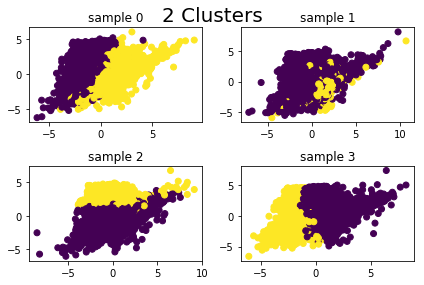

In [49]:
cluster = 2

#Make a grid of subplots.
f, axarr = plt.subplots(2, 2)
    
#Make a plot for each sample.
for i in range(4):
    
    # PCA-created features
    x_sub = predictions_df['pca_f1_sample{}'.format(i)]
    y_sub = predictions_df['pca_f2_sample{}'.format(i)]
        
    # Cluster assignments.
    c = predictions_df['clust{}_sample{}'.format(cluster, i)]
        
    # Assign the subplot to its place on the grid.
    rows = int(np.floor(i / 2))
    cols = i % 2
    axarr[rows, cols].scatter(x_sub, y_sub, c=c)
    axarr[rows, cols].set_title('sample {}'.format(i))
    
    
# Space out the plots so that the headings don't overlap axis values.
plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
plt.tight_layout()
plt.show()
print('\n')

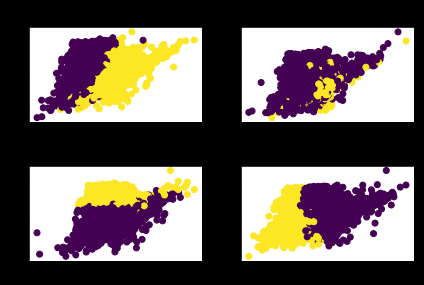

## data story

In [50]:
# Get predicted clusters from best algorithm.
full_pred = MiniBatchKMeans(
    init='k-means++',
    n_clusters=2,
    batch_size=200,
    random_state=42).fit_predict(X_std)

In [51]:
full_pred

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
df['full_pred']= full_pred

In [53]:
df.head()

,------------ Data File Created By ActiGraph Link IMU 9DOF Sensor ActiLife v6.13.3 Firmware v1.7.1 date format M/d/yyyy at 100 Hz -----------,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,full_pred
10,2018-10-24T11:20:00.0000000,0.046875,-0.008301,1.015625,31.689790,-1.403809,1.403809,-0.549316,-11.132812,7.03125,24.316405,1
11,2018-10-24T11:20:00.0100000,0.049316,-0.003906,1.016602,31.698775,-1.647949,1.342774,-0.549316,-11.132812,7.03125,24.316405,1
12,2018-10-24T11:20:00.0200000,0.045898,-0.010742,1.010254,31.695780,-2.258301,1.159668,-0.549316,-11.132812,7.03125,24.316405,1
13,2018-10-24T11:20:00.0300000,0.044922,-0.010254,1.014160,31.698775,-2.258301,1.098633,-0.549316,-11.132812,7.03125,24.316405,1
14,2018-10-24T11:20:00.0400000,0.050781,-0.011719,1.008301,31.677809,-2.380371,1.037598,-0.549316,-11.132812,7.03125,24.316405,1


In [54]:
df.groupby('full_pred').describe()

feature_1                                                     \
              count      mean       std        min       25%       50%   
full_pred                                                                
0           21786.0  0.672273  0.768452  -3.194336 -0.001953  1.008789   
1           98114.0 -0.094662  0.439133 -10.541504 -0.056152 -0.034668   

                               feature_2                                      \
                75%        max     count      mean       std   min       25%   
full_pred                                                                      
0          1.010742  11.620605   21786.0 -0.457909  1.371935 -16.0 -0.165527   
1         -0.004883   3.555664   98114.0 -0.209608  0.875692 -16.0 -0.123535   

                                         feature_3                      \
                50%       75%        max     count      mean       std   
full_pred                                                                
0         -0.042480 -0.041016  13.056641   21786.0  0.371506  1.347848   
1         -0.077148 -0.032227  10.827637   98114.0  1.264223  1.182831   

                                                              feature_4  \
                 min       25%       50%       75%        max     count   
full_pred                                                                 
0         -16.000000 -0.033691 -0.029785  1.012207  15.999512   21786.0   
1         -12.263672  1.003418  1.012207  1.102539  15.999512   98114.0   

                                                                            \
                mean       std        min        25%        50%        75%   
full_pred                                                                    
0          29.315538  0.294129  28.931231  29.092970  29.218768  29.536257   
1          30.098373  0.746069  29.146884  29.554228  29.721958  30.575583   

                     feature_5                                                 \
                 max     count       mean         std          min        25%   
full_pred                                                                       
0          31.851529   21786.0 -21.679724  202.907539 -1546.081637 -11.978913   
1          31.863510   98114.0   4.757426  201.805353 -1565.307713 -12.634278   

                                          feature_6                       \
                50%       75%         max     count      mean        std   
full_pred                                                                  
0         -1.159668 -1.098633  577.658727   21786.0  9.025333  66.397548   
1         -1.220703 -0.061035  619.689979   98114.0  4.270192  50.004926   

                                                                feature_7  \
                  min       25%       50%       75%         max     count   
full_pred                                                                   
0         -602.417029  0.854492  0.976563  4.882813  580.078160   21786.0   
1         -956.359922 -0.366211  0.976563  4.943848  663.024943   98114.0   

                                                                          \
               mean        std         min       25%       50%       75%   
full_pred                                                                  
0          6.150887  54.069992 -416.687037 -0.854492 -0.610352  0.122070   
1         -3.874188  47.468701 -591.674841 -4.211426 -0.610352 -0.061035   

                      feature_8                                              \
                  max     count       mean        std        min        25%   
full_pred                                                                     
0          584.960973   21786.0  14.930378   9.996304 -21.826171  13.330077   
1          589.294470   98114.0  29.337965  12.272651 -21.826171  26.074217   

                                           feature_9                       \
                 50%        75%        max     count       mean       std

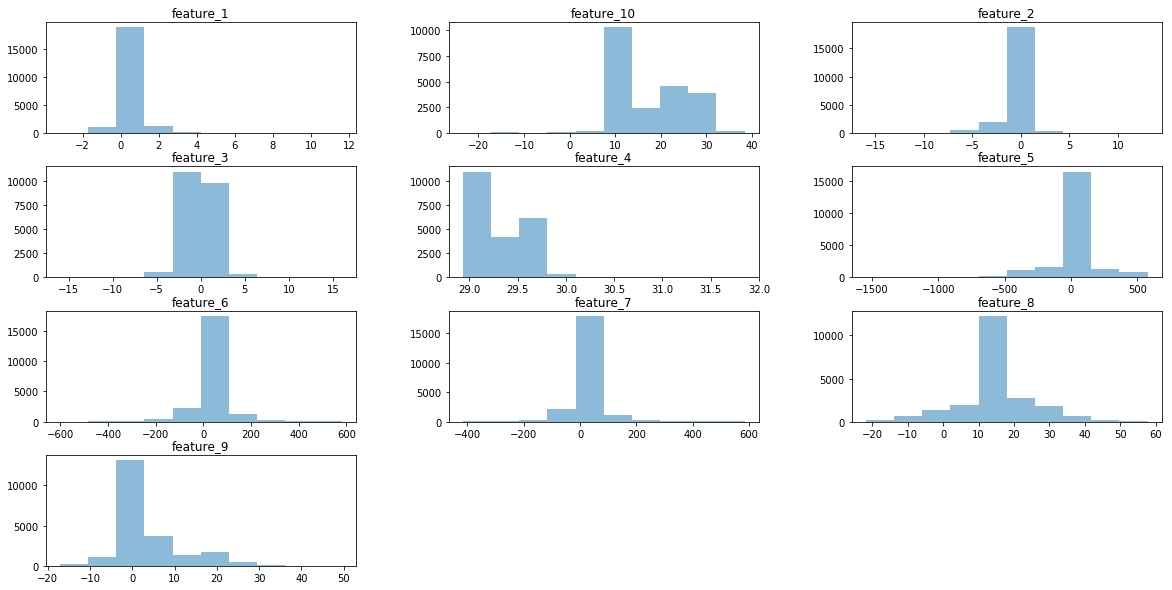

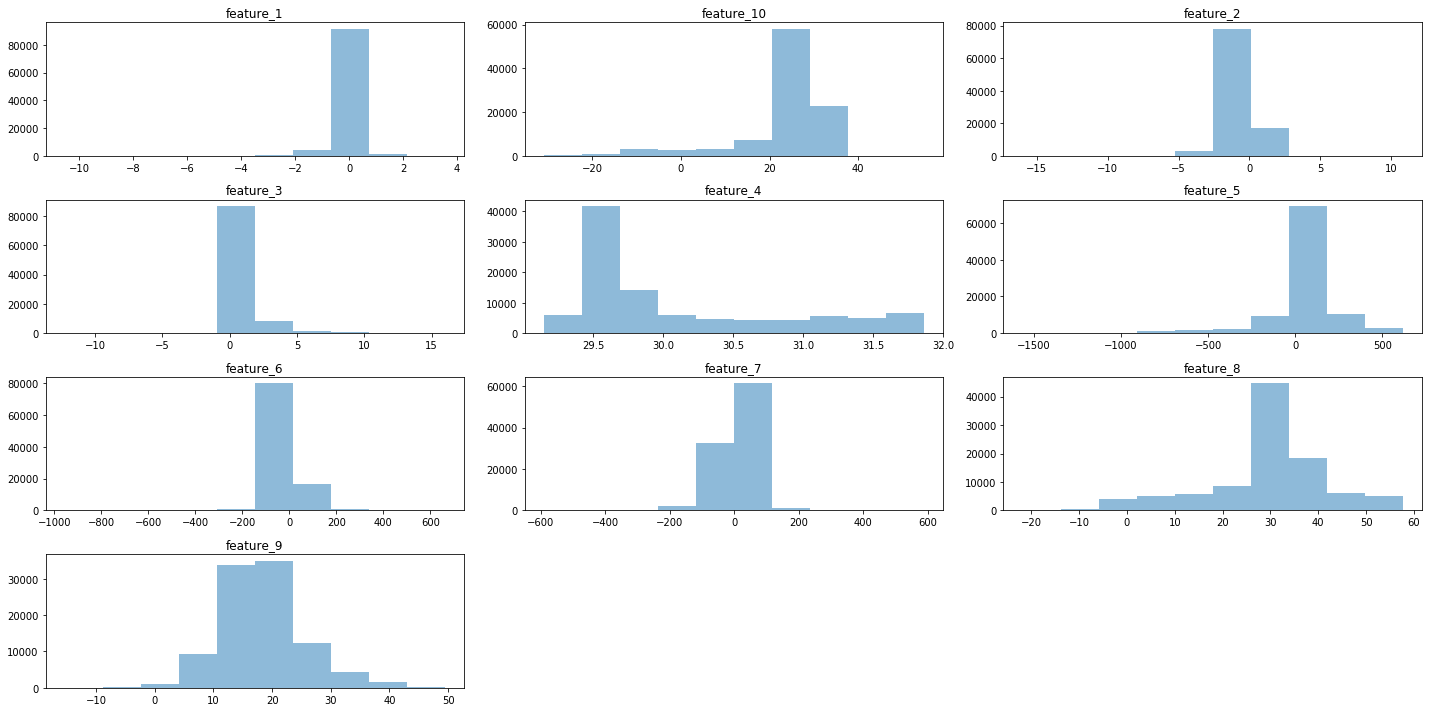

In [55]:
df.groupby('full_pred').hist(grid=False, alpha=0.5, figsize=(20, 10))
#plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'features by cluster')

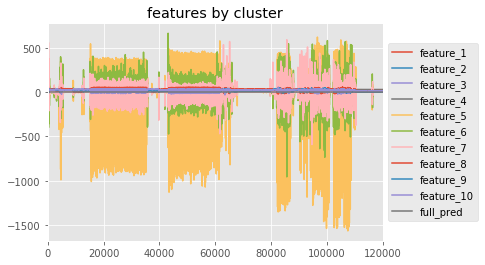

In [57]:
df.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.title('features by cluster')

In [58]:
df_clusters = df.groupby('full_pred')

Text(0.5, 1.0, 'features by clusters')

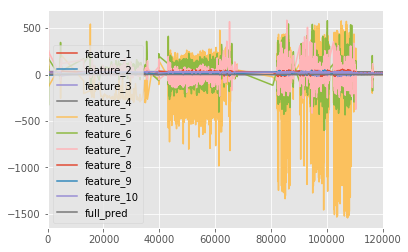

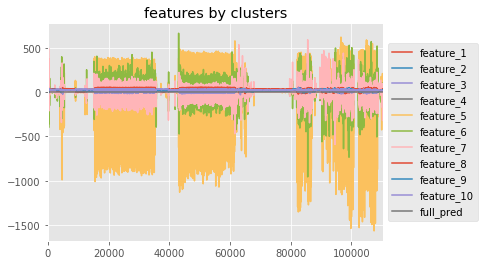

In [59]:
df_clusters.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.title('features by clusters')

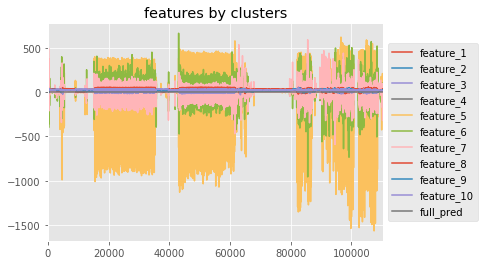

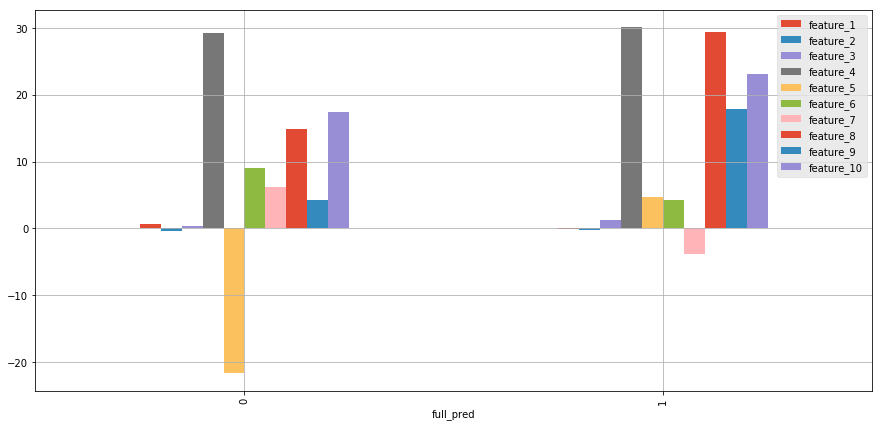

In [56]:
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('ggplot')
df.groupby(['full_pred']).mean().plot(ax=ax, kind='bar')

### observations on the data

Cluster 0 demonstrates significant visible differences from the cluster 1. Specifically and most obviously, the mean of features 5 is -21.7 for the 0 cluster and +4.75 for the 1 cluster. Feature 7 is -3.9 for the 1 cluster and +6.2 for the 0 cluster. 

Features 8, 9, 10, although positive for both clusters, also display obvious differences in the mean height. 

While it's difficult to know exactly how each feature contributes to the accuracy of the clustering algorithm, it appears that the differences between features 5 and 7 could be sufficient to distinguish the clusters. 

## clustering algorithms 
### What are the advantages of each?

**K-means: pros**
    + simple to implement
    + scales to large data sets
    + speed
    + generalizes to clusters of different 
    shapes/sizes 
   

 **K-means: cons**   
    - computational time increases with larger data sets due
    to memory constraints
    - choosing k manually
    - dependent on initial values; may not be 
    consistent
    - clustering outliers

**Mini Batch K-means: pros**

    + simple to implement
    + scales to large data sets
    + speed
    + generalizes to clusters of different 
    shapes/sizes
    +reduces the time and memory cost of K-means with larger
    data sets
 

**Mini Batch K-means: cons**

    - some loss of cluster quality vs K-means due to random
    batch selection
    - choosing k manually
    - dependent on initial values; may not be 
    consistent
    - clustering outliers

**Mean-Shift:**
    + does not require selection of number of 
    clusters
    + more versatile than k-means
    + works where many clusters are suspected
    + clusters can be different sizes
    
    - selection of bandwidth
    - slow (runtime increased with square of 
    size of input)

**Affinity propagation:**
    + clusters can be uneven in size 
    + use non-flat geometry
    + chooses number of clusters based on data
    
    - slow, memory intensive

### How do clustering and modeling compare? 
The main difference between the clustering algorithms and clustering model is the difference between "unsupervised" and "supervised" learning. 

Unsupervised learning is the process of looking at data for structures *within the data* without them being tied down to a specific outcome. 

Supervised learning, on the other hand, IS tied to a specific outcome. The first is looking for insights into the data where the second is looking for insights into the outcome. 

### Why would you want to use one over the other?
Obviously the choice between algorithms vs models would be made on the type of data available and the purpose of the data exploration, as explained above.

### Any weak points or shortcomings of your model.
Based on the silhouette scores, the MiniBatch, k-means iniated algorithm with 2-clusters specified is the best performing algorithm, followed very closely by the KMeans algorithm with 14 clusters, then 10 clusters, and then the AffinityPropagation algorithm. 

The main weakness of the first two algorithms is the need to specify the number of clusters for the algorithm to identify. The AffinityPropagation algorithm can be very slow and memory intensive to run, and may yield an impractical number of clusters to work with. 

# questions?

In [60]:
#pip install RISE

In [61]:
#jupyter-nbextension install rise --py --sys-prefix